In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model


import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#Viewing dataset
data = pd.read_csv('SinglePointData.csv')
data

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Condition
0,0.142599,365.0,366,1.425985,2.033434,-0.897223,-0.105681,6,362,368,36513,100,Good
1,0.126027,368.0,368,1.260271,1.588283,-0.395387,0.265678,5,366,371,36826,100,Good
2,0.097333,371.0,371,0.973331,0.947374,-0.400559,-0.177908,4,369,373,37089,100,Good
3,0.099372,373.0,373,0.993718,0.987475,-0.824843,0.072199,4,371,375,37332,100,Good
4,0.094554,376.0,376,0.945537,0.894040,-0.187940,-0.205709,5,373,378,37557,100,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.069559,325.0,330,10.695586,114.395556,0.435310,-0.668873,54,290,344,32322,100,Crater wear
296,1.131819,324.5,327,11.318190,128.101414,-0.008641,-0.555331,53,291,344,32314,100,Crater wear
297,1.137146,316.5,316,11.371464,129.310202,-0.046520,-0.069875,56,285,341,31677,100,Crater wear
298,1.971869,344.5,346,19.718688,388.826667,-0.073315,-1.185157,74,283,357,33304,100,Crater wear


In [3]:
#Scaling the columms 

cols_to_scale = ['Standard Error','Median','Mode', 'Standard Deviation', 'Sample Variance','Kurtosis', 'Skewness', 'Range', 'Minimum', 'Maximum', 'Sum', 'Count']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Condition
0,0.015135,0.836431,0.859060,0.015135,0.000327,0.013297,0.527690,0.017857,0.919298,0.59,0.933748,1.0,Good
1,0.012991,0.858736,0.872483,0.012991,0.000253,0.026231,0.567926,0.014286,0.933333,0.62,0.943195,1.0,Good
2,0.009277,0.881041,0.892617,0.009277,0.000147,0.026097,0.519864,0.010714,0.943860,0.64,0.951133,1.0,Good
3,0.009541,0.895911,0.906040,0.009541,0.000153,0.015162,0.546963,0.010714,0.950877,0.66,0.958468,1.0,Good
4,0.008918,0.918216,0.926174,0.008918,0.000138,0.031577,0.516852,0.014286,0.957895,0.69,0.965259,1.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.135093,0.539033,0.617450,0.135093,0.019020,0.047641,0.466669,0.189286,0.666667,0.35,0.807250,1.0,Crater wear
296,0.143150,0.535316,0.597315,0.143150,0.021301,0.036199,0.478971,0.185714,0.670175,0.35,0.807009,1.0,Crater wear
297,0.143839,0.475836,0.523490,0.143839,0.021502,0.035222,0.531569,0.196429,0.649123,0.32,0.787782,1.0,Crater wear
298,0.251861,0.684015,0.724832,0.251861,0.064676,0.034532,0.410731,0.260714,0.642105,0.48,0.836890,1.0,Crater wear


In [4]:
#One hot encoding for the independent variable "Condition"
labels = pd.get_dummies(data.Condition, prefix='Condition')
labels

,Condition_Crater wear,Condition_Flank Wear,Condition_Good,Condition_Nose Wear,Condition_Notch wear,Condition_Tool breakage
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
295,1,0,0,0,0,0
296,1,0,0,0,0,0
297,1,0,0,0,0,0
298,1,0,0,0,0,0


In [5]:
data.shape

(300, 13)

In [6]:
#Extracting all the unique wear conditions from the dataset
data.Condition.unique()

array(['Good', 'Notch wear', 'Nose Wear', 'Flank Wear', 'Tool breakage ',
       'Crater wear'], dtype=object)

In [7]:
#Creating a different dataset for the "Condition" column
y = data.Condition
#Dropping the "Condition" Column from the original dataset
X = data.drop('Condition', axis=1)

<AxesSubplot:ylabel='Condition'>

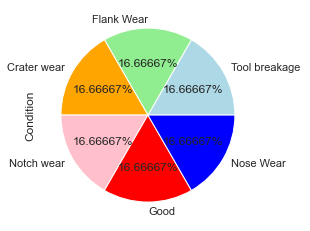

In [8]:
#Piechart to understand the distribution of various Conditions
data.Condition.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink', 'red', 'blue'])

In [9]:
#Converting categorical value of condition to numeric
#https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/
labels = pd.get_dummies(data.Condition, prefix='Condition')
labels

,Condition_Crater wear,Condition_Flank Wear,Condition_Good,Condition_Nose Wear,Condition_Notch wear,Condition_Tool breakage
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
295,1,0,0,0,0,0
296,1,0,0,0,0,0
297,1,0,0,0,0,0
298,1,0,0,0,0,0


In [10]:
#Step already done above
X = data.drop('Condition', axis=1)
X

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count
0,0.015135,0.836431,0.859060,0.015135,0.000327,0.013297,0.527690,0.017857,0.919298,0.59,0.933748,1.0
1,0.012991,0.858736,0.872483,0.012991,0.000253,0.026231,0.567926,0.014286,0.933333,0.62,0.943195,1.0
2,0.009277,0.881041,0.892617,0.009277,0.000147,0.026097,0.519864,0.010714,0.943860,0.64,0.951133,1.0
3,0.009541,0.895911,0.906040,0.009541,0.000153,0.015162,0.546963,0.010714,0.950877,0.66,0.958468,1.0
4,0.008918,0.918216,0.926174,0.008918,0.000138,0.031577,0.516852,0.014286,0.957895,0.69,0.965259,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.135093,0.539033,0.617450,0.135093,0.019020,0.047641,0.466669,0.189286,0.666667,0.35,0.807250,1.0
296,0.143150,0.535316,0.597315,0.143150,0.021301,0.036199,0.478971,0.185714,0.670175,0.35,0.807009,1.0
297,0.143839,0.475836,0.523490,0.143839,0.021502,0.035222,0.531569,0.196429,0.649123,0.32,0.787782,1.0
298,0.251861,0.684015,0.724832,0.251861,0.064676,0.034532,0.410731,0.260714,0.642105,0.48,0.836890,1.0


In [11]:
#Creating an array of the "conditions" based on the one hot encoded data
y = labels.values
y

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

# #Training Testing Model

In [12]:
#Splitting into testing and training data with teh 80:20 ratio
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state= 30)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)
print(y_train)



print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

     Standard Error    Median      Mode  Standard Deviation  Sample Variance  \
64         0.007167  0.695167  0.724832            0.007167         0.000098   
85         0.005992  0.702602  0.731544            0.005992         0.000075   
8          0.008180  0.970260  0.966443            0.008180         0.000120   
112        0.137816  0.327138  0.409396            0.137816         0.019777   
154        0.198071  0.178439  0.295302            0.198071         0.040280   

     Kurtosis  Skewness     Range   Minimum  Maximum       Sum  Count  
64   0.024878  0.564330  0.007143  0.859649     0.39  0.877517    1.0  
85   0.061107  0.491979  0.010714  0.859649     0.40  0.879810    1.0  
8    0.038343  0.612132  0.010714  0.985965     0.76  0.986840    1.0  
112  0.010510  0.521922  0.150000  0.600000     0.05  0.721409    1.0  
154  0.141982  0.696617  0.346429  0.505263     0.33  0.668951    1.0  
(240, 12)
[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 ...
 [1 0 0 0 0 0]
 

In [13]:
#https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/
#Creating/defining the Neural Network Model 
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(12, activation='selu')(input_layer)
dense_layer_2 = Dense(11, activation='selu')(dense_layer_1)
dense_layer_3 = Dense(10, activation='selu')(dense_layer_2)
dense_layer_4 = Dense(9, activation='selu')(dense_layer_3)
dense_layer_5 = Dense(8, activation='selu')(dense_layer_4)
output = Dense(y.shape[1], activation='softmax')(dense_layer_5)

#Compiling the model based on above mentioned attributes
model = Model(inputs=input_layer, outputs=output)
model.compile(loss='kullback_leibler_divergence', optimizer='adam', metrics=['acc'])
#model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['acc'])


In [16]:
X.shape

(300, 12)

In [644]:
y.shape[1]

6

In [645]:
#summary of the model
#print(model.summary())

In [702]:
#Running the training dataset through the model 500 times
#history = model.fit(X_train, y_train, epochs=1000, verbose=1)
history = model.fit(X_train, y_train, epochs=3000, verbose=1,shuffle = True)
#history = model.fit(X_train, y_train, epochs=10000, verbose=1,validation_split=0.3,)


Epoch 1/3000
8/8 [==============================] - 0s 2ms/step - loss: 2.0716 - acc: 0.0583
Epoch 2/3000
8/8 [==============================] - 0s 2ms/step - loss: 1.8846 - acc: 0.1125
Epoch 3/3000
8/8 [==============================] - 0s 2ms/step - loss: 1.7582 - acc: 0.1333
Epoch 4/3000
8/8 [==============================] - 0s 2ms/step - loss: 1.6967 - acc: 0.1792
Epoch 5/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.6451 - acc: 0.3708
Epoch 6/3000
8/8 [==============================] - 0s 2ms/step - loss: 1.5988 - acc: 0.3708
Epoch 7/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5504 - acc: 0.3708
Epoch 8/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5053 - acc: 0.3583
Epoch 9/3000
8/8 [==============================] - 0s 2ms/step - loss: 1.4631 - acc: 0.3708
Epoch 10/3000
8/8 [==============================] - 0s 2ms/step - loss: 1.4242 - acc: 0.3708
Epoch 11/3000
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 2ms/step - loss: 0.4832 - acc: 0.8042
Epoch 175/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4841 - acc: 0.7708
Epoch 176/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4855 - acc: 0.7833
Epoch 177/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4825 - acc: 0.7958
Epoch 178/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4879 - acc: 0.7750
Epoch 179/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4789 - acc: 0.7917
Epoch 180/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.4817 - acc: 0.7917
Epoch 181/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4785 - acc: 0.7958
Epoch 182/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4764 - acc: 0.8000
Epoch 183/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.4772 - acc: 0.8083
Epoch 184/3000
8/8 [==============================] - 0s 2ms/step

Epoch 346/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.3569 - acc: 0.8292
Epoch 347/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.3706 - acc: 0.8375
Epoch 348/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.3781 - acc: 0.8417
Epoch 349/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.3385 - acc: 0.8458
Epoch 350/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.3158 - acc: 0.8625
Epoch 351/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.3341 - acc: 0.8708
Epoch 352/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.3143 - acc: 0.8667
Epoch 353/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.3232 - acc: 0.8708
Epoch 354/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.2961 - acc: 0.8792
Epoch 355/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.3043 - acc: 0.8750
Epoch 356/3000
8/8 [==============================

8/8 [==============================] - 0s 2ms/step - loss: 0.1669 - acc: 0.9500
Epoch 519/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1784 - acc: 0.9458
Epoch 520/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1666 - acc: 0.9500
Epoch 521/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1795 - acc: 0.9458
Epoch 522/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1597 - acc: 0.9500
Epoch 523/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1639 - acc: 0.9542
Epoch 524/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1601 - acc: 0.9583
Epoch 525/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1630 - acc: 0.9583
Epoch 526/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1567 - acc: 0.9500
Epoch 527/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1600 - acc: 0.9500
Epoch 528/3000
8/8 [==============================] - 0s 2ms/step

Epoch 604/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1411 - acc: 0.9583
Epoch 605/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1356 - acc: 0.9625
Epoch 606/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1381 - acc: 0.9542
Epoch 607/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1690 - acc: 0.9417
Epoch 608/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1820 - acc: 0.9292
Epoch 609/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1583 - acc: 0.9375
Epoch 610/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1318 - acc: 0.9625
Epoch 611/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1515 - acc: 0.9583
Epoch 612/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1397 - acc: 0.9625
Epoch 613/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1326 - acc: 0.9583
Epoch 614/3000
8/8 [==============================

8/8 [==============================] - 0s 2ms/step - loss: 0.1141 - acc: 0.9667
Epoch 776/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1140 - acc: 0.9708
Epoch 777/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1009 - acc: 0.9708
Epoch 778/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1272 - acc: 0.9625
Epoch 779/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1280 - acc: 0.9708
Epoch 780/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1116 - acc: 0.9667
Epoch 781/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1096 - acc: 0.9625
Epoch 782/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1167 - acc: 0.9625
Epoch 783/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1083 - acc: 0.9667
Epoch 784/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1158 - acc: 0.9542
Epoch 785/3000
8/8 [==============================] - 0s 2ms/step

8/8 [==============================] - 0s 2ms/step - loss: 0.0909 - acc: 0.9750
Epoch 948/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1057 - acc: 0.9667
Epoch 949/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1127 - acc: 0.9667
Epoch 950/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1082 - acc: 0.9667
Epoch 951/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1093 - acc: 0.9667
Epoch 952/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0891 - acc: 0.9708
Epoch 953/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.0921 - acc: 0.9750
Epoch 954/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0765 - acc: 0.9750
Epoch 955/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1350 - acc: 0.9500
Epoch 956/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0939 - acc: 0.9708
Epoch 957/3000
8/8 [==============================] - 0s 2ms/step

8/8 [==============================] - 0s 2ms/step - loss: 0.0997 - acc: 0.9583
Epoch 1034/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1467 - acc: 0.9458
Epoch 1035/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0954 - acc: 0.9625
Epoch 1036/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1380 - acc: 0.9417
Epoch 1037/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1334 - acc: 0.9542
Epoch 1038/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1328 - acc: 0.9417
Epoch 1039/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0954 - acc: 0.9708
Epoch 1040/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0864 - acc: 0.9750
Epoch 1041/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1045 - acc: 0.9750
Epoch 1042/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1230 - acc: 0.9500
Epoch 1043/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0846 - acc: 0.9708
Epoch 1204/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0954 - acc: 0.9583
Epoch 1205/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1955 - acc: 0.9167
Epoch 1206/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.2326 - acc: 0.9000
Epoch 1207/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.2330 - acc: 0.9333
Epoch 1208/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1279 - acc: 0.9458
Epoch 1209/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1716 - acc: 0.9292
Epoch 1210/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1066 - acc: 0.9708
Epoch 1211/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0962 - acc: 0.9625
Epoch 1212/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0863 - acc: 0.9708
Epoch 1213/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0614 - acc: 0.9792
Epoch 1374/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1244 - acc: 0.9500
Epoch 1375/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0907 - acc: 0.9625
Epoch 1376/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0989 - acc: 0.9708
Epoch 1377/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0687 - acc: 0.9750
Epoch 1378/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0926 - acc: 0.9625
Epoch 1379/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0747 - acc: 0.9792
Epoch 1380/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0794 - acc: 0.9750
Epoch 1381/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.0876 - acc: 0.9750
Epoch 1382/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0701 - acc: 0.9750
Epoch 1383/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0560 - acc: 0.9750
Epoch 1544/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0543 - acc: 0.9833
Epoch 1545/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0634 - acc: 0.9792
Epoch 1546/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0712 - acc: 0.9750
Epoch 1547/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9750
Epoch 1548/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0621 - acc: 0.9750
Epoch 1549/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0574 - acc: 0.9750
Epoch 1550/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.0561 - acc: 0.9833
Epoch 1551/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0563 - acc: 0.9792
Epoch 1552/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0566 - acc: 0.9792
Epoch 1553/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0593 - acc: 0.9708
Epoch 1714/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0692 - acc: 0.9708
Epoch 1715/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0725 - acc: 0.9792
Epoch 1716/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0668 - acc: 0.9708
Epoch 1717/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0669 - acc: 0.9792
Epoch 1718/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0542 - acc: 0.9875
Epoch 1719/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0536 - acc: 0.9833
Epoch 1720/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0584 - acc: 0.9708
Epoch 1721/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0574 - acc: 0.9792
Epoch 1722/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0487 - acc: 0.9875
Epoch 1723/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0499 - acc: 0.9833
Epoch 1799/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0525 - acc: 0.9792
Epoch 1800/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0500 - acc: 0.9833
Epoch 1801/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0498 - acc: 0.9833
Epoch 1802/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0471 - acc: 0.9833
Epoch 1803/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0470 - acc: 0.9833
Epoch 1804/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0854 - acc: 0.9625
Epoch 1805/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0725 - acc: 0.9708
Epoch 1806/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0843 - acc: 0.9750
Epoch 1807/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0663 - acc: 0.9750
Epoch 1808/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.1743 - acc: 0.9250
Epoch 1969/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1702 - acc: 0.9333
Epoch 1970/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1191 - acc: 0.9542
Epoch 1971/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0886 - acc: 0.9708
Epoch 1972/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1207 - acc: 0.9458
Epoch 1973/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0744 - acc: 0.9792
Epoch 1974/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0517 - acc: 0.9875
Epoch 1975/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0593 - acc: 0.9792
Epoch 1976/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0622 - acc: 0.9792
Epoch 1977/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0502 - acc: 0.9875
Epoch 1978/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0495 - acc: 0.9833
Epoch 2054/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0468 - acc: 0.9792
Epoch 2055/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0535 - acc: 0.9833
Epoch 2056/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0651 - acc: 0.9708
Epoch 2057/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0637 - acc: 0.9667
Epoch 2058/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0623 - acc: 0.9792
Epoch 2059/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0511 - acc: 0.9750
Epoch 2060/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0509 - acc: 0.9792
Epoch 2061/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0606 - acc: 0.9708
Epoch 2062/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0760 - acc: 0.9750
Epoch 2063/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0674 - acc: 0.9792
Epoch 2139/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0804 - acc: 0.9708
Epoch 2140/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0626 - acc: 0.9833
Epoch 2141/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0670 - acc: 0.9792
Epoch 2142/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0555 - acc: 0.9792
Epoch 2143/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0440 - acc: 0.9875
Epoch 2144/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0479 - acc: 0.9792
Epoch 2145/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0498 - acc: 0.9833
Epoch 2146/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1068 - acc: 0.9583
Epoch 2147/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1143 - acc: 0.9583
Epoch 2148/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0613 - acc: 0.9833
Epoch 2309/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0468 - acc: 0.9792
Epoch 2310/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0499 - acc: 0.9792
Epoch 2311/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0488 - acc: 0.9750
Epoch 2312/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0472 - acc: 0.9833
Epoch 2313/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0428 - acc: 0.9833
Epoch 2314/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.0497 - acc: 0.9833
Epoch 2315/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0671 - acc: 0.9625
Epoch 2316/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0463 - acc: 0.9875
Epoch 2317/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.0528 - acc: 0.9833
Epoch 2318/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0548 - acc: 0.9792
Epoch 2479/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0527 - acc: 0.9750
Epoch 2480/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0688 - acc: 0.9750
Epoch 2481/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0696 - acc: 0.9750
Epoch 2482/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0525 - acc: 0.9792
Epoch 2483/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0542 - acc: 0.9833
Epoch 2484/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0533 - acc: 0.9792
Epoch 2485/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0510 - acc: 0.9792
Epoch 2486/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0496 - acc: 0.9833
Epoch 2487/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0484 - acc: 0.9875
Epoch 2488/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.1051 - acc: 0.9417
Epoch 2649/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1303 - acc: 0.9458
Epoch 2650/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.1254 - acc: 0.9583
Epoch 2651/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0927 - acc: 0.9667
Epoch 2652/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0998 - acc: 0.9708
Epoch 2653/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0535 - acc: 0.9792
Epoch 2654/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0505 - acc: 0.9750
Epoch 2655/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0942 - acc: 0.9625
Epoch 2656/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0686 - acc: 0.9875
Epoch 2657/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0488 - acc: 0.9833
Epoch 2658/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0461 - acc: 0.9833
Epoch 2819/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0400 - acc: 0.9833
Epoch 2820/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0718 - acc: 0.9833
Epoch 2821/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0660 - acc: 0.9667
Epoch 2822/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0662 - acc: 0.9750
Epoch 2823/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0601 - acc: 0.9708
Epoch 2824/3000
8/8 [==============================] - 0s 1ms/step - loss: 0.0742 - acc: 0.9750
Epoch 2825/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0740 - acc: 0.9708
Epoch 2826/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0710 - acc: 0.9750
Epoch 2827/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0561 - acc: 0.9875
Epoch 2828/3000
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.0632 - acc: 0.9667
Epoch 2989/3000
8/8 [==============================] - ETA: 0s - loss: 0.1213 - acc: 0.968 - 0s 2ms/step - loss: 0.0563 - acc: 0.9833
Epoch 2990/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0456 - acc: 0.9792
Epoch 2991/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0573 - acc: 0.9833
Epoch 2992/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0622 - acc: 0.9708
Epoch 2993/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0556 - acc: 0.9750
Epoch 2994/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0399 - acc: 0.9917
Epoch 2995/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0439 - acc: 0.9875
Epoch 2996/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.0402 - acc: 0.9833
Epoch 2997/3000
8/8 [==============================] - 0s 2ms/step - loss: 0.0413 - acc: 0.9833
Epoch 2998/3000
8/

In [218]:
#weights = model.get_weights()
#weights

In [703]:
#Evaluating the model based on score and accuracy
score = model.evaluate(X_test, y_test, verbose=1)


#print("Test Score:", score[0])
print("Test Accuracy:", score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.9824 - acc: 0.8833
Test Accuracy: 0.8833333253860474


In [533]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history.history.keys())

dict_keys(['loss', 'acc'])


KeyError: 'val_acc'

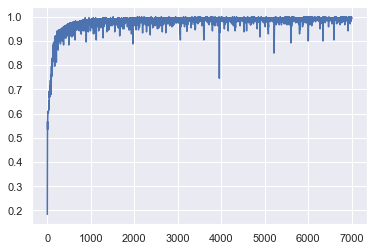

In [622]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
#Graph of accuracy vs no. of epochs
#For training graph
plt.plot(history.history['acc'])
#for testing graph
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'val_loss'

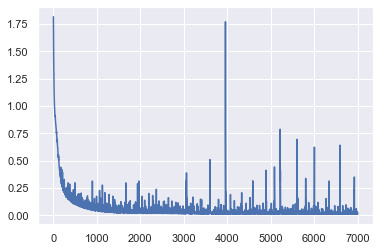

In [623]:
#Graph of loss vs no. of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [666]:
#Extracting the output probability arrays
y_predicted = model.predict(X_test)
y_predicted.shape
y_predicted


array([[2.76027492e-13, 1.77559301e-08, 1.55667294e-07, 9.99999881e-01,
        4.73153070e-15, 1.56760379e-12],
       [1.60612270e-20, 6.62768873e-23, 3.05538382e-02, 8.43083914e-09,
        9.69445944e-01, 1.90911393e-07],
       [5.58529152e-19, 5.10836041e-15, 2.12914806e-08, 5.69114478e-10,
        3.61696016e-06, 9.99996305e-01],
       [5.36623548e-19, 2.22506132e-22, 3.49769413e-01, 1.01538049e-07,
        6.50230169e-01, 4.18526866e-07],
       [8.26238596e-20, 6.45746744e-22, 7.88887963e-02, 5.33471116e-08,
        9.21108484e-01, 2.59532067e-06],
       [9.99999523e-01, 5.36878185e-18, 4.79381056e-29, 4.91232356e-07,
        5.65696067e-30, 1.60395012e-29],
       [9.51753625e-20, 8.51052225e-22, 1.84593687e-03, 3.63959918e-10,
        9.98150647e-01, 3.27892940e-06],
       [1.51056576e-13, 9.99935269e-01, 1.59137270e-13, 1.26097688e-10,
        4.10115214e-12, 6.46766493e-05],
       [4.13394265e-22, 2.29351226e-25, 9.79723394e-01, 2.23242694e-07,
        2.02763658e-02, 

In [667]:
#Finding the maximum probability in a sample array using argmax
np.argmax(y_predicted[3])

4

In [668]:
#Creating an array of maximum probailities to find output predicted by model
y_predicted_lables = [np.argmax(i) for i in y_predicted]
y_predicted_lables[:10]
#y_test

[3, 4, 5, 4, 4, 0, 4, 1, 2, 0]

In [669]:
#Extracting and creating an array of the actual conditions of the test dataset 
y_test_cm=[np.argmax(i) for i in y_test]
y_test_cm[:10]

[3, 4, 5, 4, 4, 0, 4, 1, 2, 0]

In [670]:
#Confusion matrix of true conditions vs predicted conditions
cm = tf.math.confusion_matrix(labels=y_test_cm,predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[ 7,  1,  0,  0,  0,  0],
       [ 0,  7,  0,  1,  0,  0],
       [ 0,  0,  8,  0,  1,  1],
       [ 0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0, 11]])>

Text(66.5, 0.5, 'Truth')

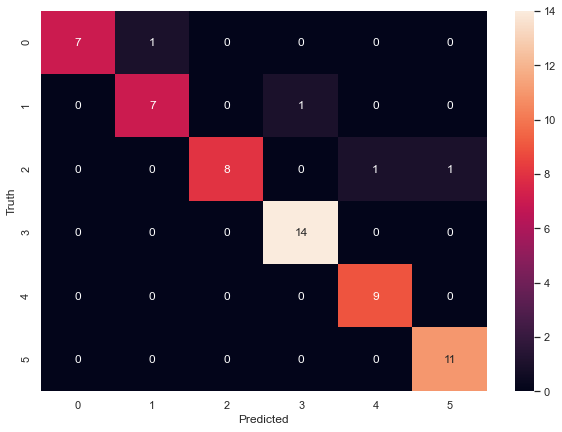

In [671]:
#Confusion Matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')